### Data Science 3 Supervised learning - Final Assignment
Load, inspect and clean the data. Split the data into a training set and a validation set and a test set. Use a simple classifier as a baseline. Train various classifiers. Motivate your choice in relation to the characteristics of the dataset. Try to combine them into an ensemble learning model that outperforms all of the others.

Step
1. Load and prepare the data
2. Cleaning the data
3. Split the data into a training set and a validation set and a test set.

## Import package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report , mean_squared_error , confusion_matrix , accuracy_score, recall_score, precision_score, f1_score , roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import class_weight

## Background
Dysphonic Voice Pattern Analysis of Patients in Parkinson's Disease Using Minimum Interclass Probability Risk Feature Selection and Bagging Ensemble Learning Methods

The selected dataset is a Patients in Parkinson's Disease (http://archive.ics.uci.edu/ml/datasets/Parkinsons). The dataset contains 195 participants and 22 features. Using this data as a model classify patient with Parkinson's Disease.

# 1.Load and prepare Data

In [2]:
# Matrix column entries (attributes):
# name - ASCII subject name and recording number
# MDVP:Fo(Hz) - Average vocal fundamental frequency
# MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
# MDVP:Flo(Hz) - Minimum vocal fundamental frequency
# MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
# MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
# NHR,HNR - Two measures of ratio of noise to tonal components in the voice
# status - Health status of the subject (one) - Parkinson's, (zero) - healthy
# RPDE,D2 - Two nonlinear dynamical complexity measures
# DFA - Signal fractal scaling exponent
# spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

df = pd.read_csv("/Users/kai/Desktop/Hanze/course/MachineLearning/Supervised/BFVM19DATASC3-main/assignment/final_assignment/parkinsons.data")
# check head and tail to see if the data is correctly loaded
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [4]:
# Get an idea of the size of the data
# So we have 24 columns (and 195 observations).
# One of these is the `name` column, another is the `status` (which will be our y-vector).
# That means what we have 22 features that we need to work with. Let's see if we can reduce that number somewhat.
df.shape

(195, 24)

In [5]:
# check whether the data is correct data type or not.
# There is one object which is the name column and one int which is the status column.
# So, we do not have to change data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# Checking for null values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# describe the dataset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# checking whether there is strange data in the diagnostics (the y-vector)
df.status.unique()

array([1, 0])

Number of Parkinson's patient: 48
Number of healthy person : 147
percentage of Parkinson's person: 24.62%
percentage of healthy person: 75.38%


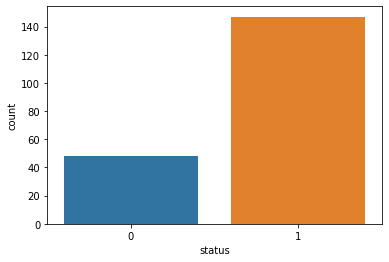

In [9]:
# count number of observations in each class
healthy,Parkinson = df.status.value_counts()
print(f'Number of Parkinson\'s patient: {Parkinson}')
print(f'Number of healthy person : {healthy }')
print(f'percentage of Parkinson\'s person: {round(Parkinson / len(df) * 100, 2)}%')
print(f'percentage of healthy person: {round(healthy / len(df) * 100, 2)}%')
g = sns.countplot(x='status',label="Count",data = df)

## 2.Cleaning the data

In [10]:
# Remove the useless column (Name)
df = df.drop(columns="name")

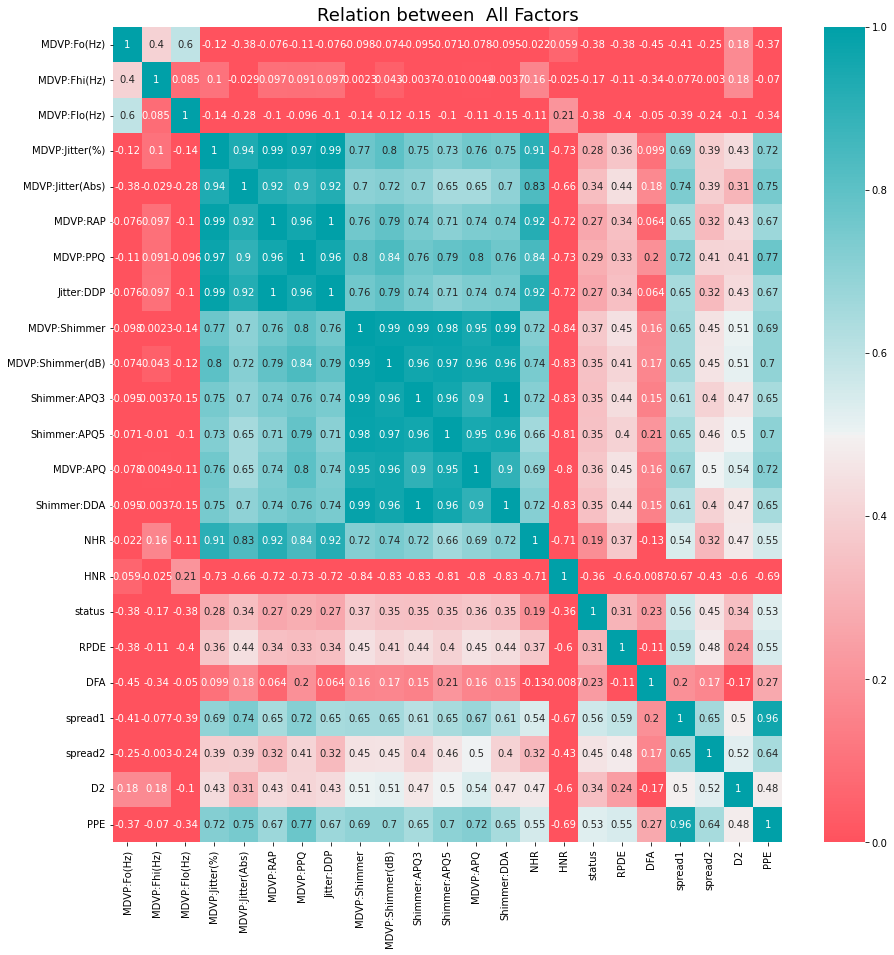

In [11]:
# check the correlation of all of the variable.
plt.rcParams["figure.figsize"] = (15, 15)
cmap = sns.diverging_palette(10, 200, 100, 60, as_cmap=True)
plt.title('Relation between  All Factors', fontsize=18)
sns.heatmap(df.corr(), annot = True, cmap=cmap, vmin=0, vmax=1)
plt.show()

In [12]:
# There are too many variable with highly correlated with each other.
# So, if variables are highly correlated, we can choose one of the variables instead of all variables.
dfc = df.copy()
dfc = dfc.select_dtypes(include=['float64','int64']) # only take numeric values

#filter highly related variables
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

to_remove = pd.DataFrame(corrFilter(dfc, 0.8))
to_remove.tail()


0
MDVP:RAP    MDVP:Jitter(%)  0.990276
Jitter:DDP  MDVP:Jitter(%)  0.990276
            MDVP:RAP        1.000000
Shimmer:DDA Shimmer:APQ3    1.000000
MDVP:Fo(Hz) MDVP:Fo(Hz)          NaN

In [13]:
variable_to_remove = to_remove.reset_index()['level_1'].tolist()
print(df.shape)
df = df.drop(variable_to_remove, axis = 1)
print(df.shape)

(195, 23)
(195, 9)


In [14]:
# only 9 columns can be used
df.columns

Index(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'status', 'RPDE', 'DFA',
       'spread2', 'D2', 'PPE'],
      dtype='object')

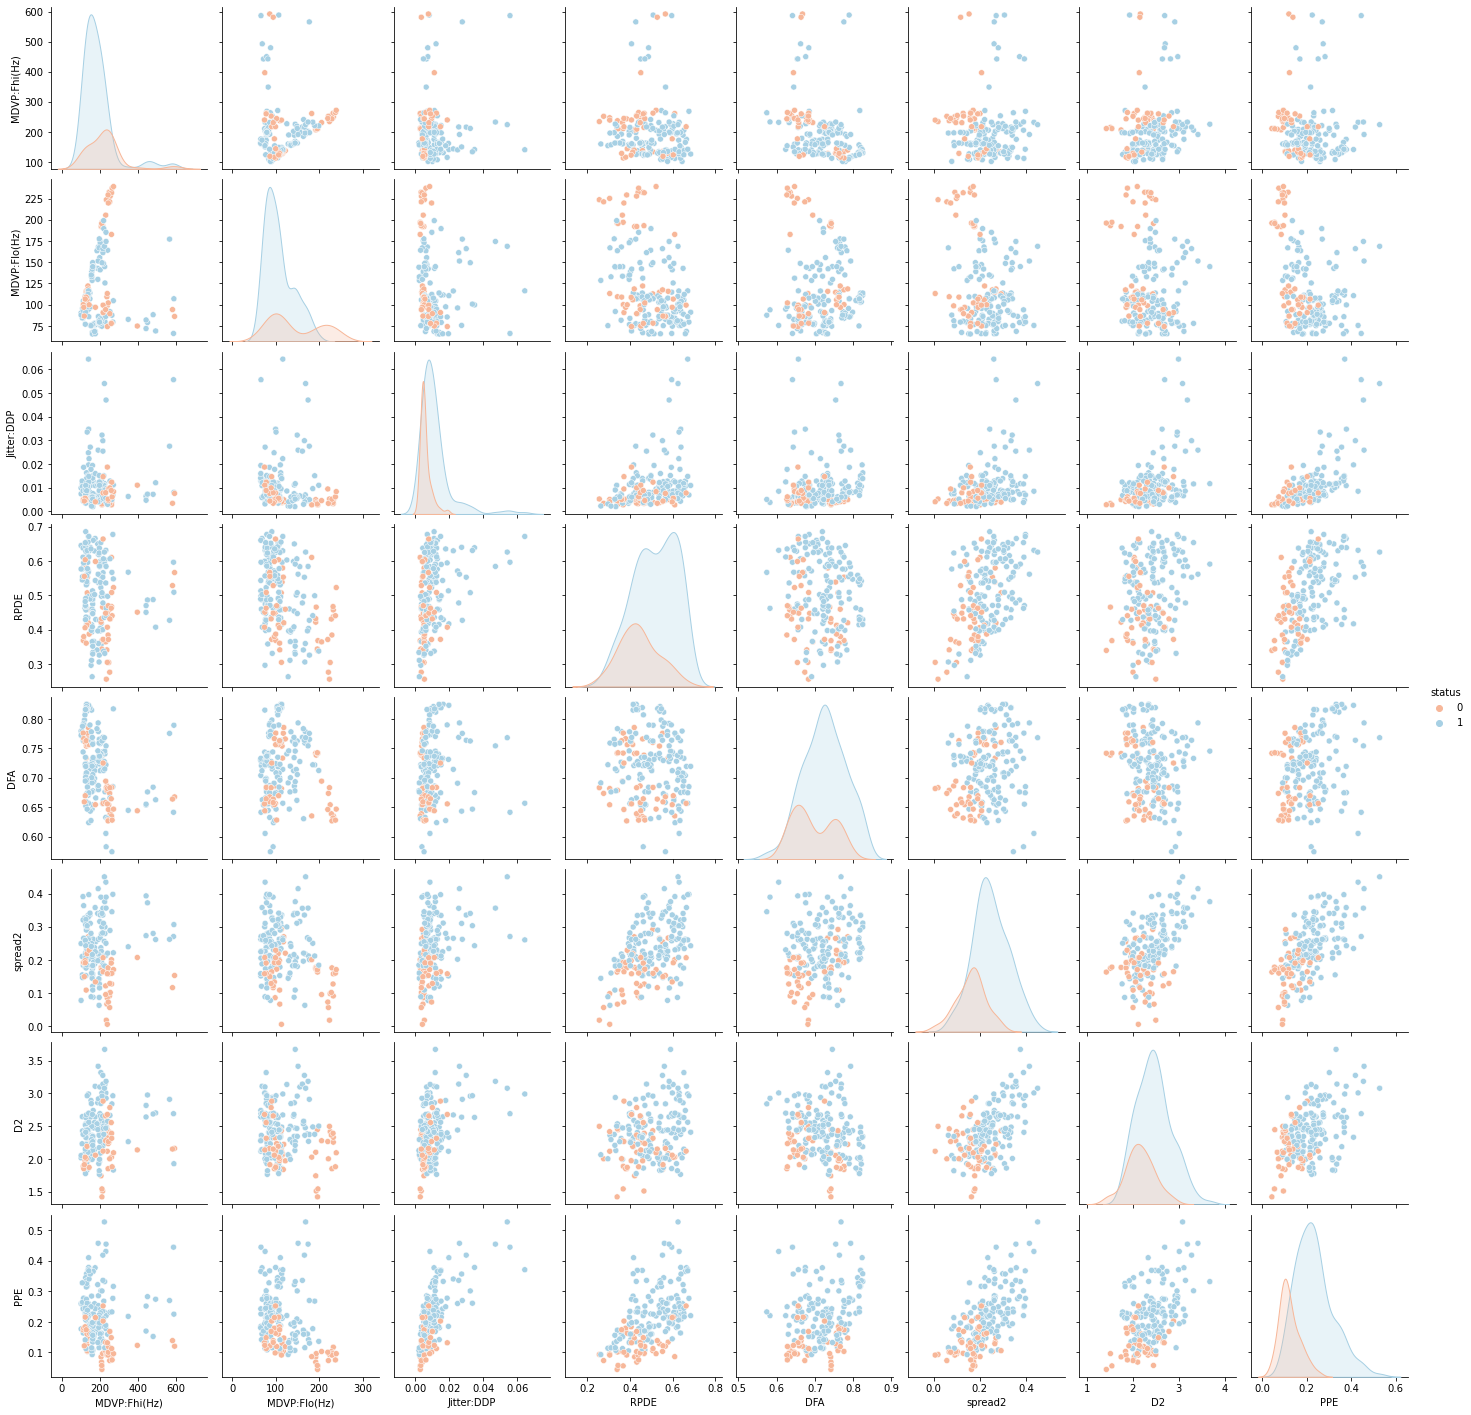

In [15]:
# drawing relations between these features to check whether there are still high correlations between any of them.
cols = ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'status', 'RPDE', 'DFA', 'spread2', 'D2', 'PPE']
sns.pairplot(data=df[cols], hue='status', palette='RdBu')

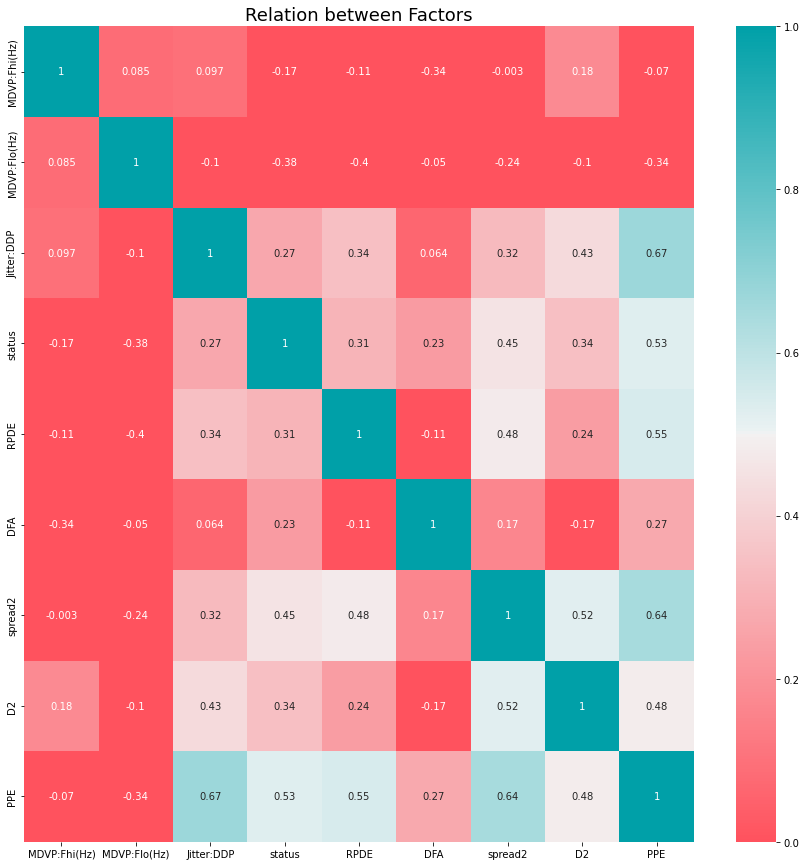

In [16]:
plt.rcParams["figure.figsize"] = (15, 15)
cmap = sns.diverging_palette(10, 200, 100, 60, as_cmap=True)
plt.title('Relation between Factors', fontsize=18)
sns.heatmap(df.corr(), annot = True, cmap=cmap, vmin=0, vmax=1)
plt.show()

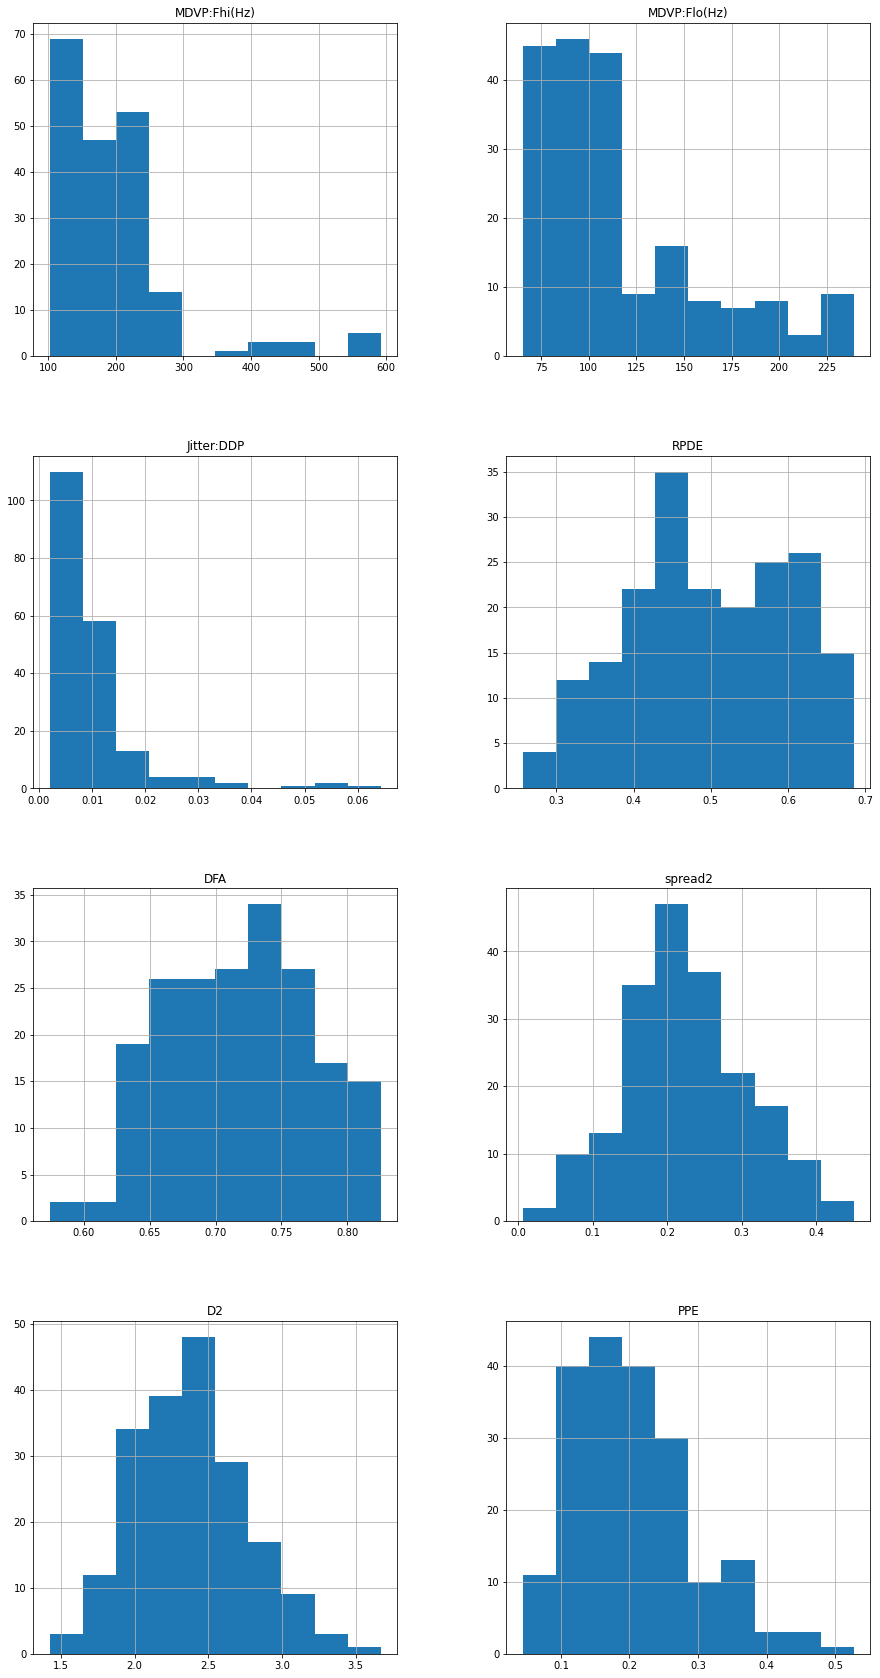

In [17]:
# To view the distribution of the data, for each feature a histogram is generated
# MDVP:Fhi,MDVP:Flo,Jitter:DDP, are left skewed to left. It should be normalized in the later step.
fig, axis = plt.subplots(4,2,figsize=(15, 30))
df.drop(columns="status").hist(ax=axis)
plt.show()

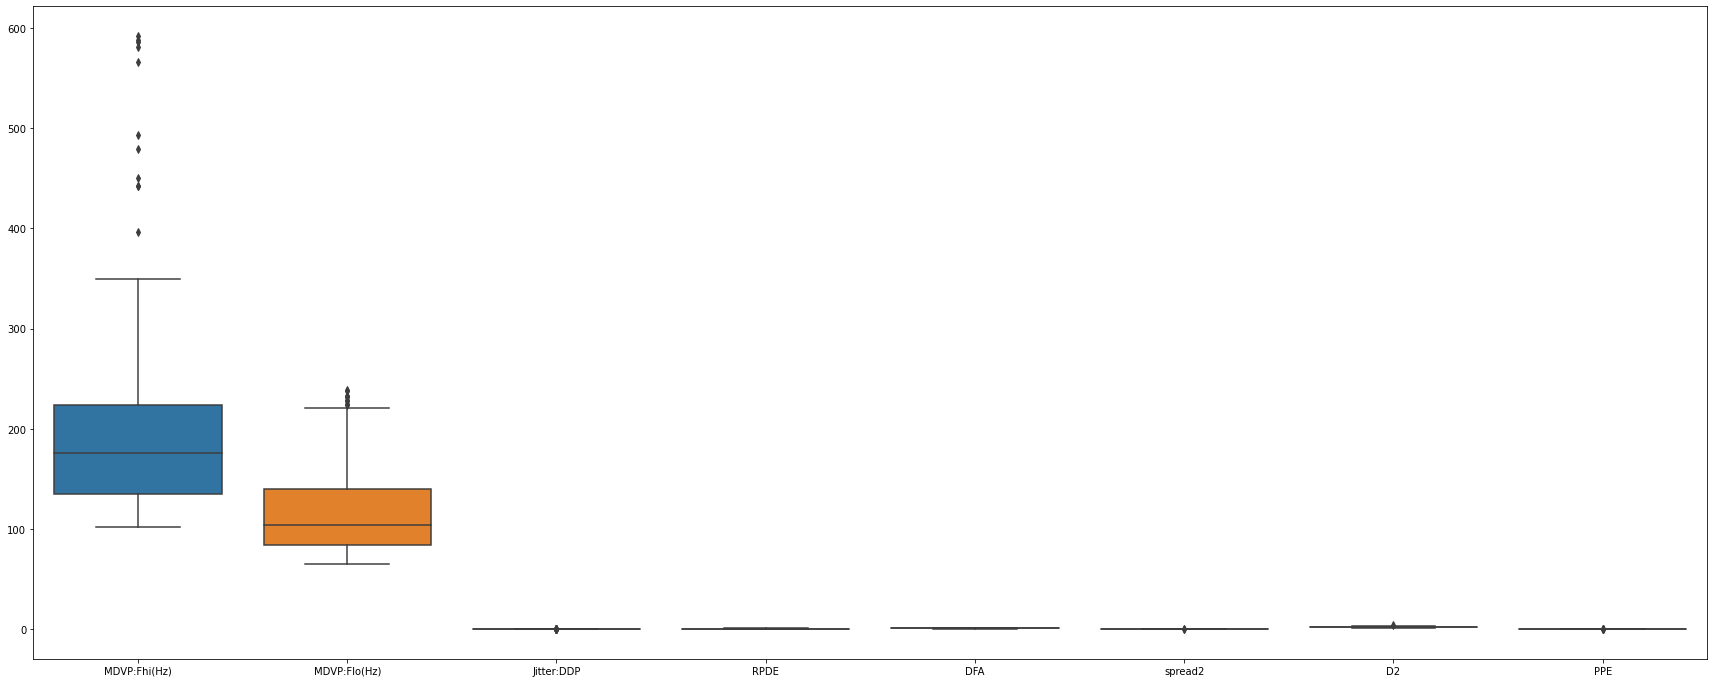

In [18]:
plt.figure(figsize=(30,12))
sns.boxplot(data=df.drop(columns="status"))
plt.show()

## Create the feature matrix and vector
select the columns which we want to analysis, and also check the shape

In [19]:
cols = ['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'RPDE', 'DFA', 'spread2', 'D2', 'PPE']
X = df[cols]
y = df['status']
print(X.shape)
print(y.shape)

(195, 8)
(195,)


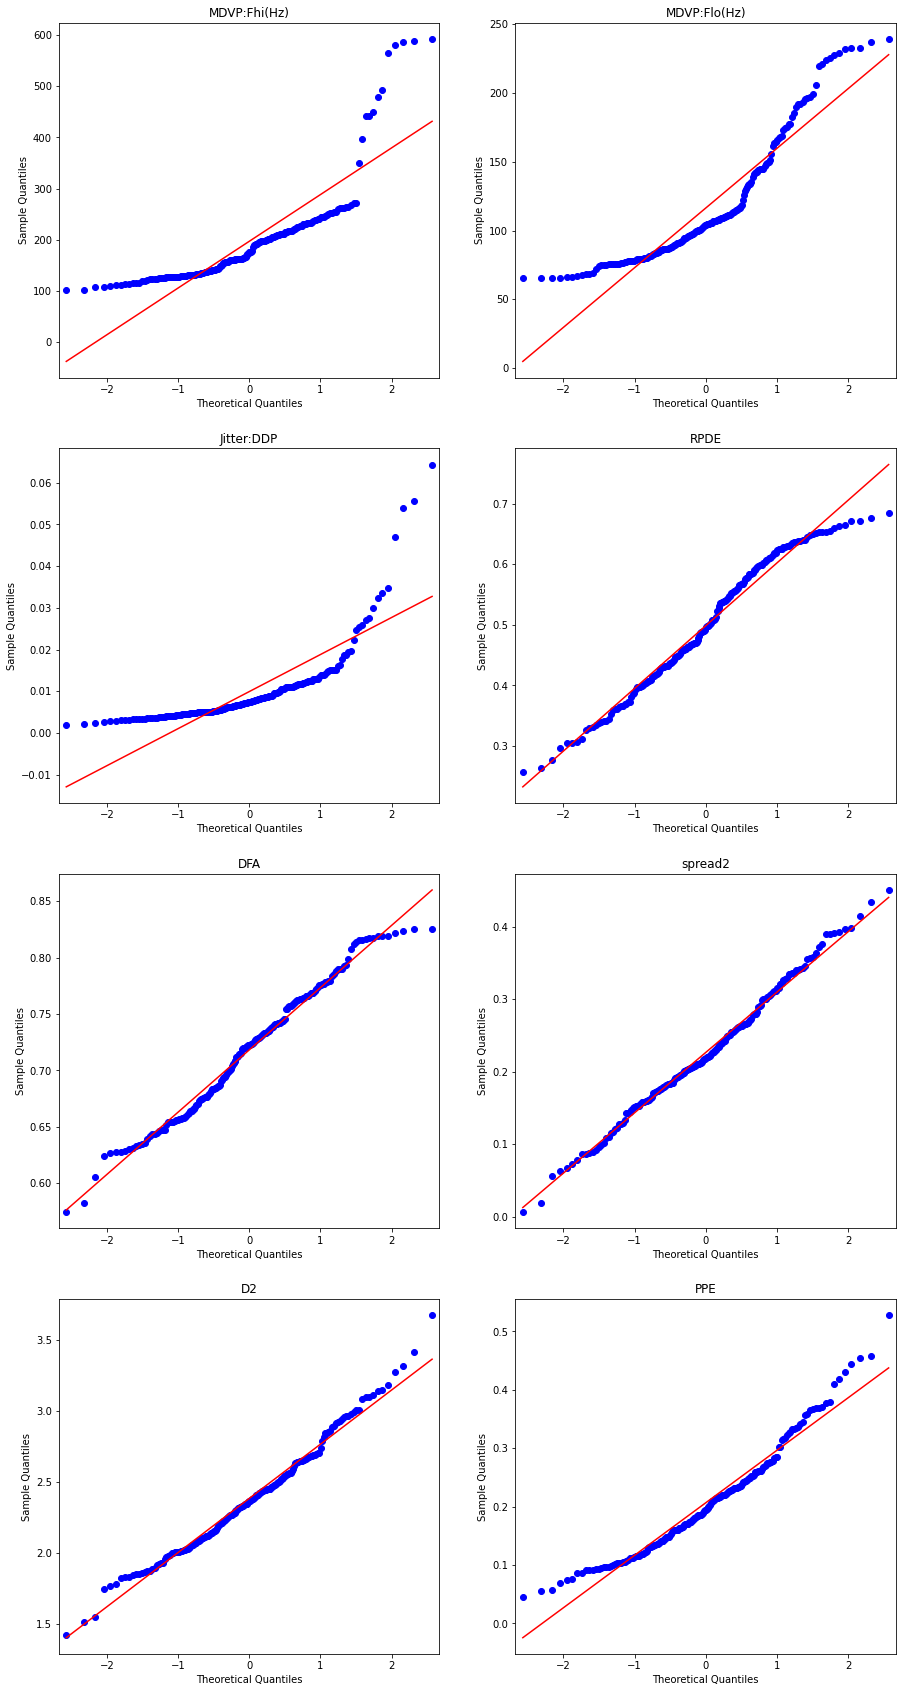

In [20]:
from statsmodels.graphics.gofplots import qqplot
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))
axs = axs.flatten()
for index, col_name in enumerate(X.columns):
    qqplot(X[col_name], fmt='b', marker='o', line='s', ax=axs[index])
    axs[index].set_title(col_name)

## Normalize data

In [21]:
# https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/#:~:text=Taking%20the%20square%20root%20and,log%20and%20the%20square%20root.
# I try boxcox to make it more normal distributed.
from scipy import stats
for col_name in X.columns:
    X[col_name], _ = stats.boxcox(X[col_name])

/var/folders/74/hchwhhz568x878t9vflxnjfh0000gn/T/ipykernel_6145/925512517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name], _ = stats.boxcox(X[col_name])


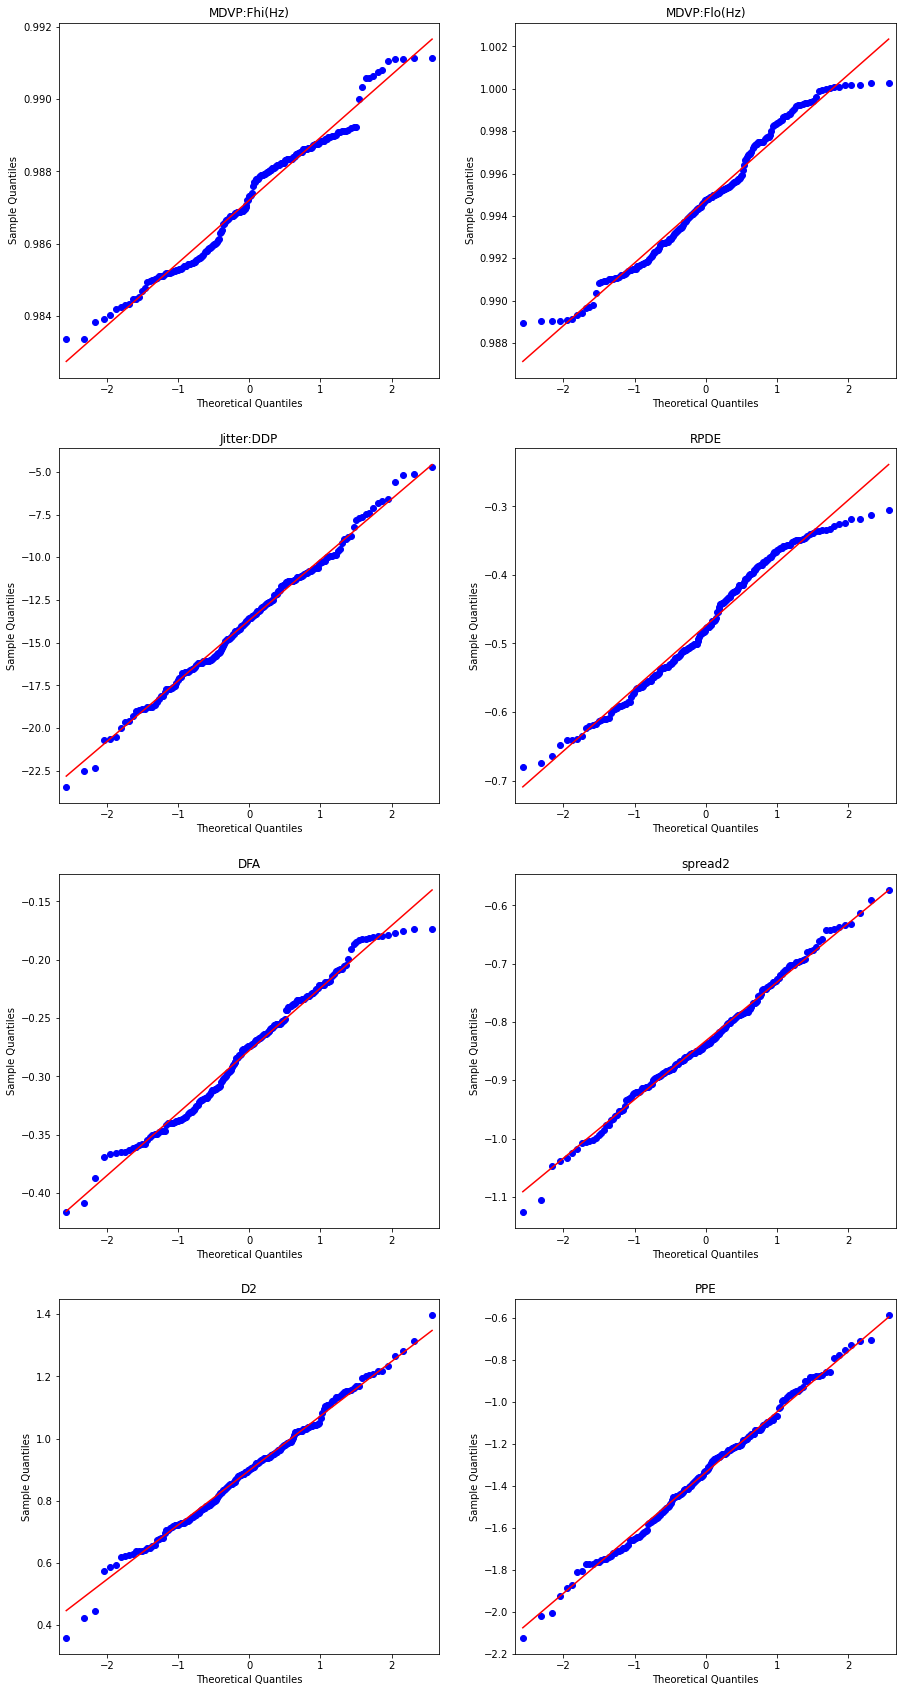

In [22]:
# After using boxcox it becomes better.
from statsmodels.graphics.gofplots import qqplot
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))
axs = axs.flatten()
for index, col_name in enumerate(X.columns):
    qqplot(X[col_name], fmt='b', marker='o', line='s', ax=axs[index])
    axs[index].set_title(col_name)

## Create a simple model

In [23]:
from sklearn.model_selection import train_test_split
#split and use stratify to keep the percentage of the healthy and Parkinson's patient
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=y)

In [24]:
# Evaluate function
def evaluate(y_test, y_pred, X_test, clf):
    cm = confusion_matrix(y_test, y_pred)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    print(cm_labled,"\n")
    print(classification_report(y_test, y_pred))
    print(clf.score(X_test, y_test))

def roc_auc(model,X_test,y_test,model_name):
    # generate a no skill (ns) prediction and model predictions.
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
    ns_probs = [0 for i in range(len(y_test))]
    model_probs = model.predict_proba(X_test)[:,1]
    # calculating scores for no skill and model
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    print('\n')
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(f'{model_name}: ROC AUC=%.3f' % (model_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

      
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

In [25]:
#training type function
def training_type(get_type,X_train, X_test, y_train, y_test,kernel_type = "rbf", estimators = 10, randomstate=0):
    if get_type == "lg":
        model = LogisticRegression()
    if get_type == "dt":
        model = DecisionTreeClassifier()
    if get_type == "svm":
        model = SVC(kernel= kernel_type )
    if get_type == "gnb":
        model = GaussianNB()
    if get_type == "rf":
        model = RandomForestClassifier(n_estimators = estimators)
    if get_type == "grad":
        model = GradientBoostingClassifier(random_state=randomstate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate(y_test, y_pred, X_test, model)
    plot_learning_curves(model, X_train, y_train, X_test, y_test)


                    Predict : negative  Predict :positive 
Actual : negative                    9                   6
Actual : positive                    1                  43 

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

0.8813559322033898
test  acc: 0.8813559322033898
train acc: 0.8161764705882353


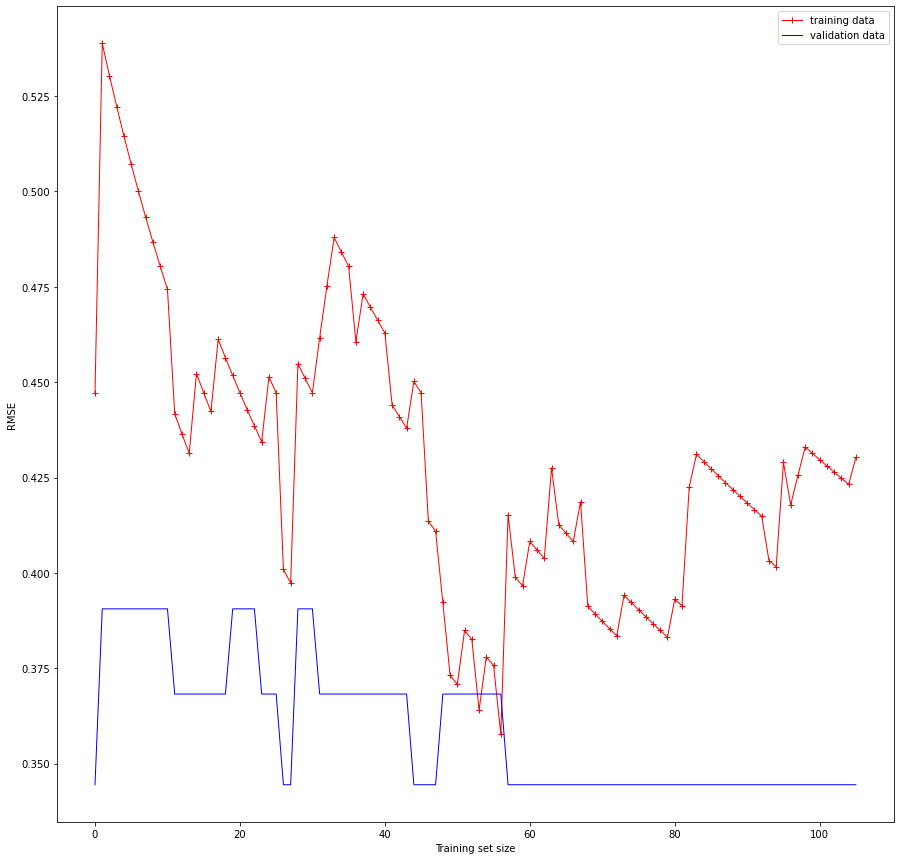

In [26]:
# training with LogisticRegression
# The accuracy for LogisticRegression seems quite nice. However, there might be other model perform better.
# Let's try other model.
training_type("lg",X_train, X_test, y_train, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   13                   2
Actual : positive                    3                  41 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.95      0.93      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

0.9152542372881356
test  acc: 0.9152542372881356
train acc: 1.0


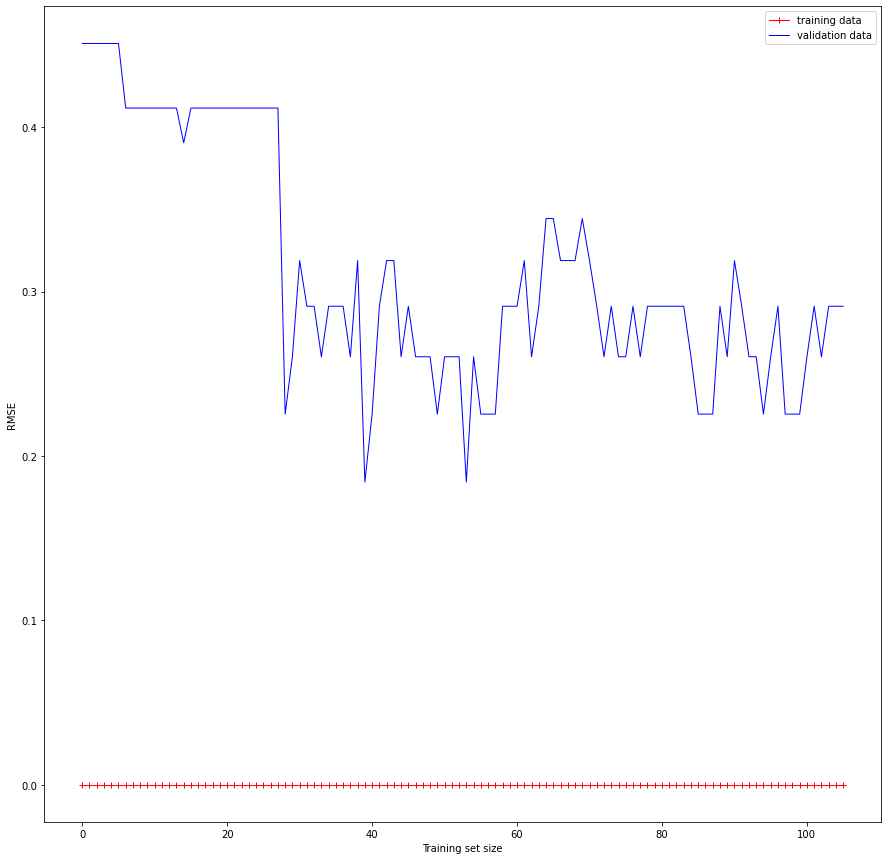

In [27]:
# training with GradientBoostingClassifier
training_type("grad",X_train, X_test, y_train, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   15                   0
Actual : positive                    5                  39 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.89      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.94      0.90        59
weighted avg       0.94      0.92      0.92        59

0.9152542372881356
test  acc: 0.9152542372881356
train acc: 1.0


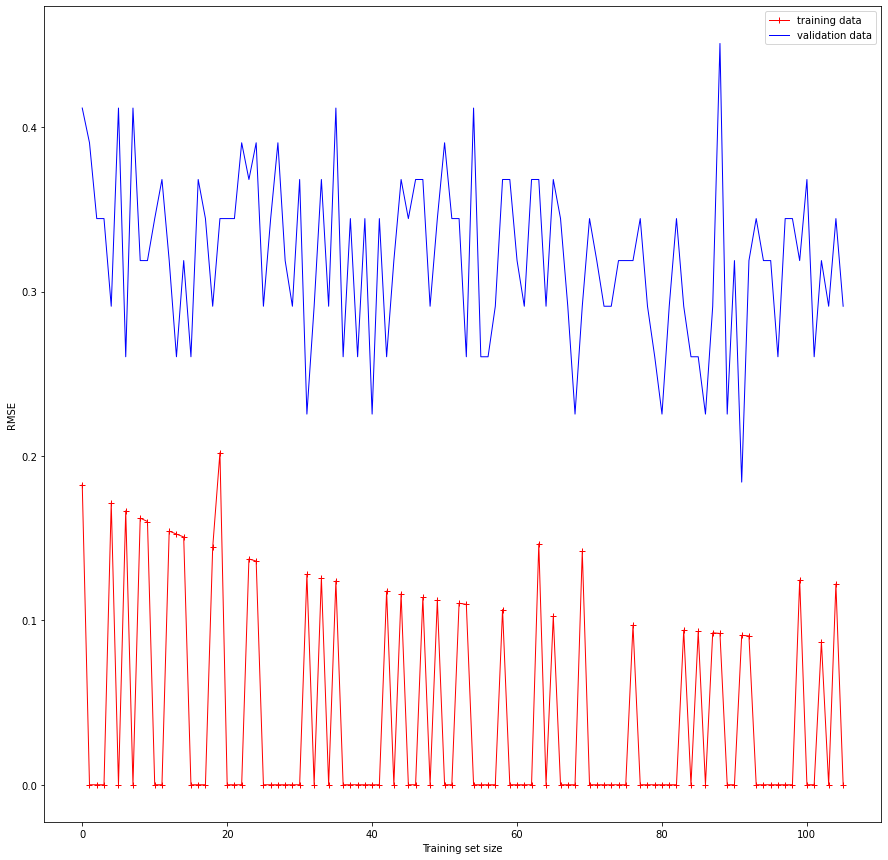

In [28]:
# training with RandomForestClassifier
training_type("rf",X_train, X_test, y_train, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   11                   4
Actual : positive                    4                  40 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59

0.864406779661017
test  acc: 0.8813559322033898
train acc: 1.0


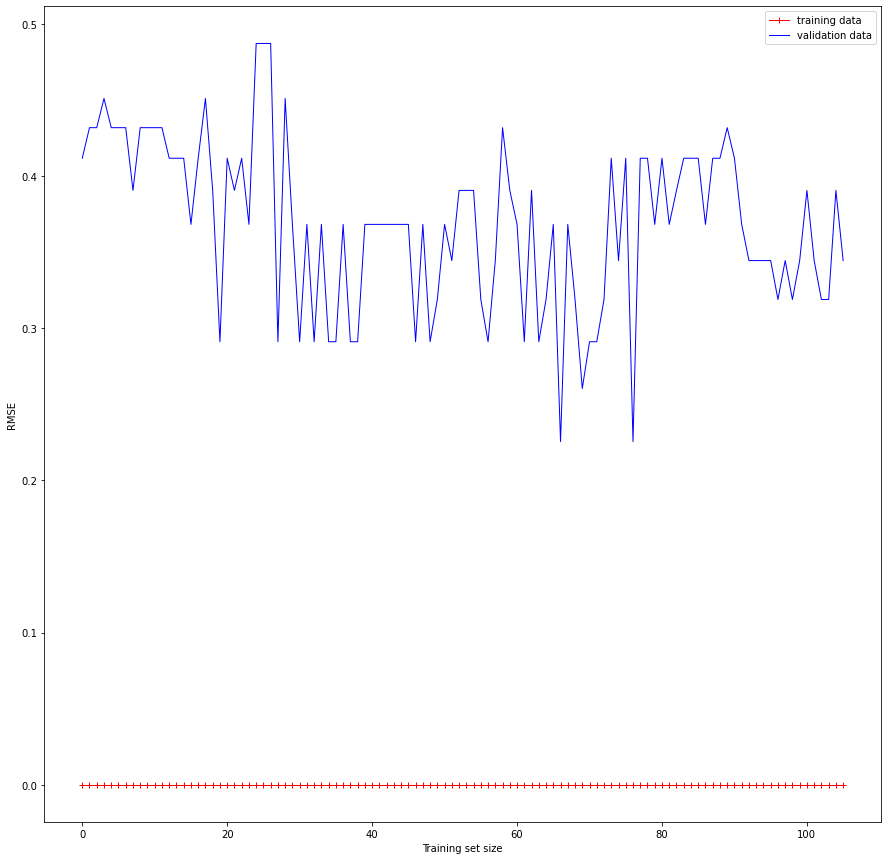

In [29]:
# training with DecisionTreeClassifier
training_type("dt",X_train, X_test, y_train, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                    0                  15
Actual : positive                    0                  44 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.85        44

    accuracy                           0.75        59
   macro avg       0.37      0.50      0.43        59
weighted avg       0.56      0.75      0.64        59

0.7457627118644068


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test  acc: 0.7457627118644068
train acc: 0.7573529411764706


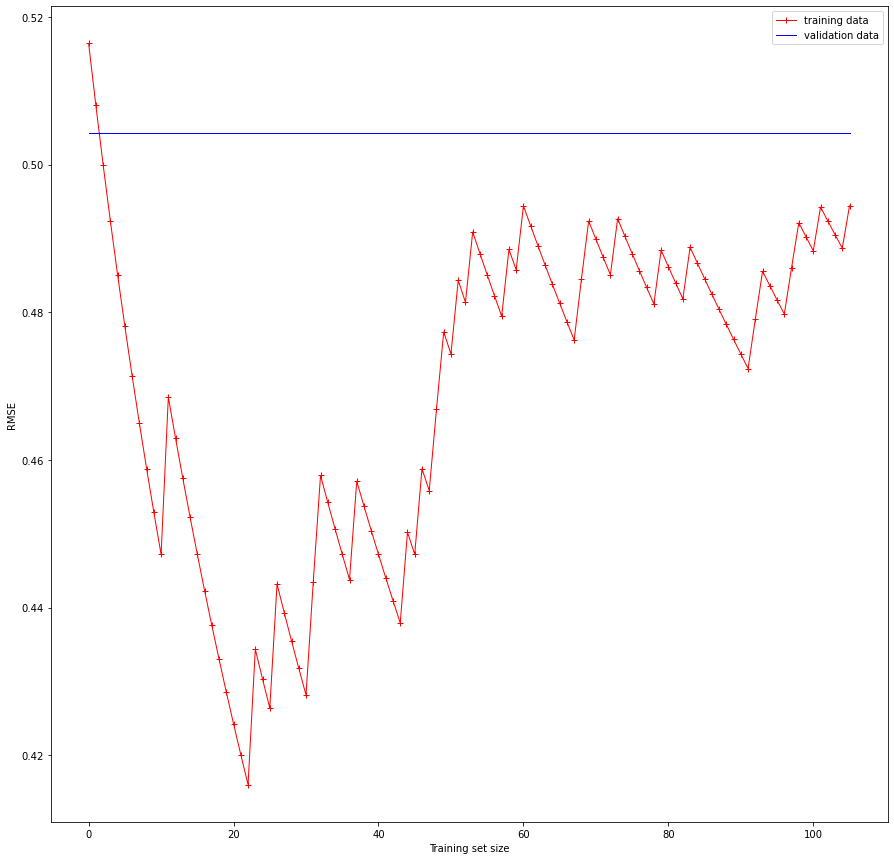

In [30]:
# training with SVC
training_type("svm",X_train, X_test, y_train, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   12                   3
Actual : positive                    7                  37 

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.93      0.84      0.88        44

    accuracy                           0.83        59
   macro avg       0.78      0.82      0.79        59
weighted avg       0.85      0.83      0.84        59

0.8305084745762712
test  acc: 0.8305084745762712
train acc: 0.7720588235294118


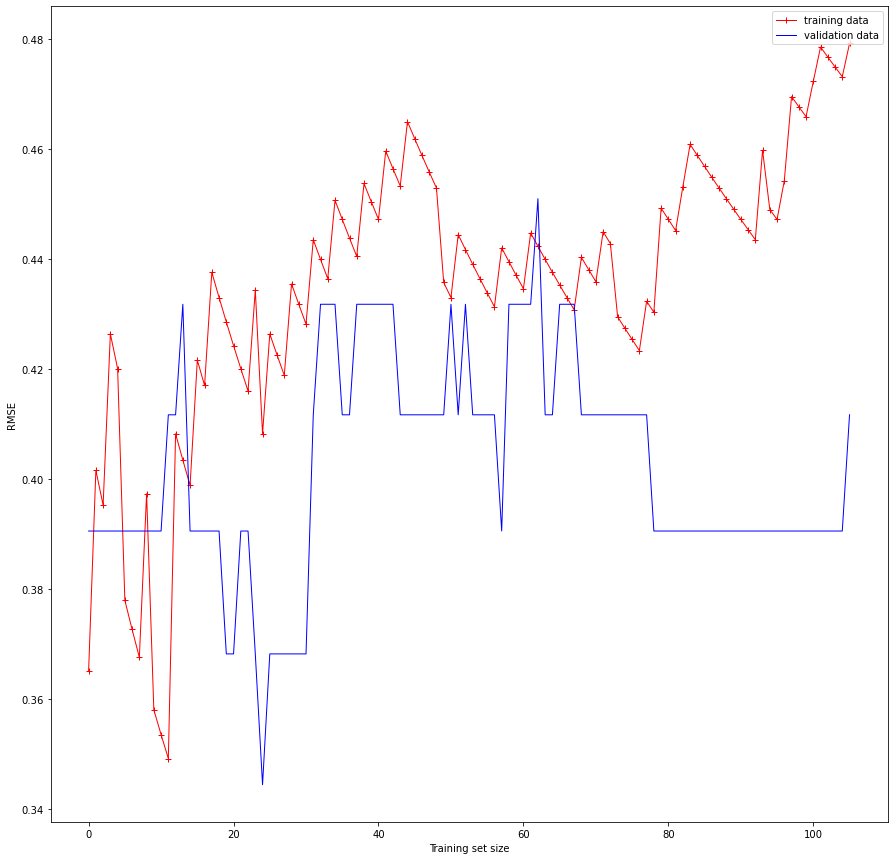

In [31]:
# training with GaussianNB
training_type("gnb",X_train, X_test, y_train, y_test)



No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.976


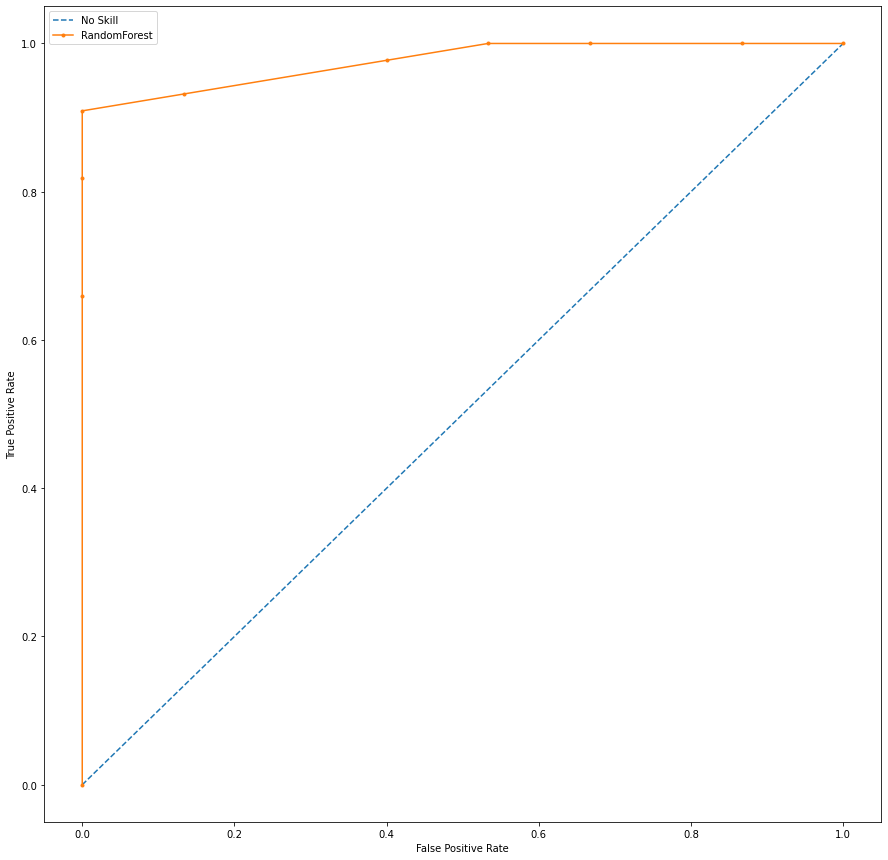

In [32]:
# I try different model. I got different result from each result. However, RandomForestClassifier keeps in a higher accuracy.
# I think it will be a better model for classifying the data.
roc_auc(RandomForestClassifier(n_estimators = 10),X_test,y_test,model_name = "RandomForest")

## Compare different model by different way
https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

Logistic Regression: basic linear classifier (good to baseline)

Random Forest: ensemble bagging classifier

K-Nearest Neighbors: instance based classifier

Support Vector Machines: maximum margin classifier

Gaussian Naive Bayes: probabilistic classifier


In [33]:
def run_exps(X_train, y_train, X_test, y_test):
    '''
    Tests several common models to verify which one functions best for given data
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    dfs = []
    models = [
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()),
        ('GNB', GaussianNB()),
        ('DT',DecisionTreeClassifier()),
        ("GRAD",GradientBoostingClassifier(random_state=0))]

    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final
final = run_exps(X_train, y_train, X_test, y_test)
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedM

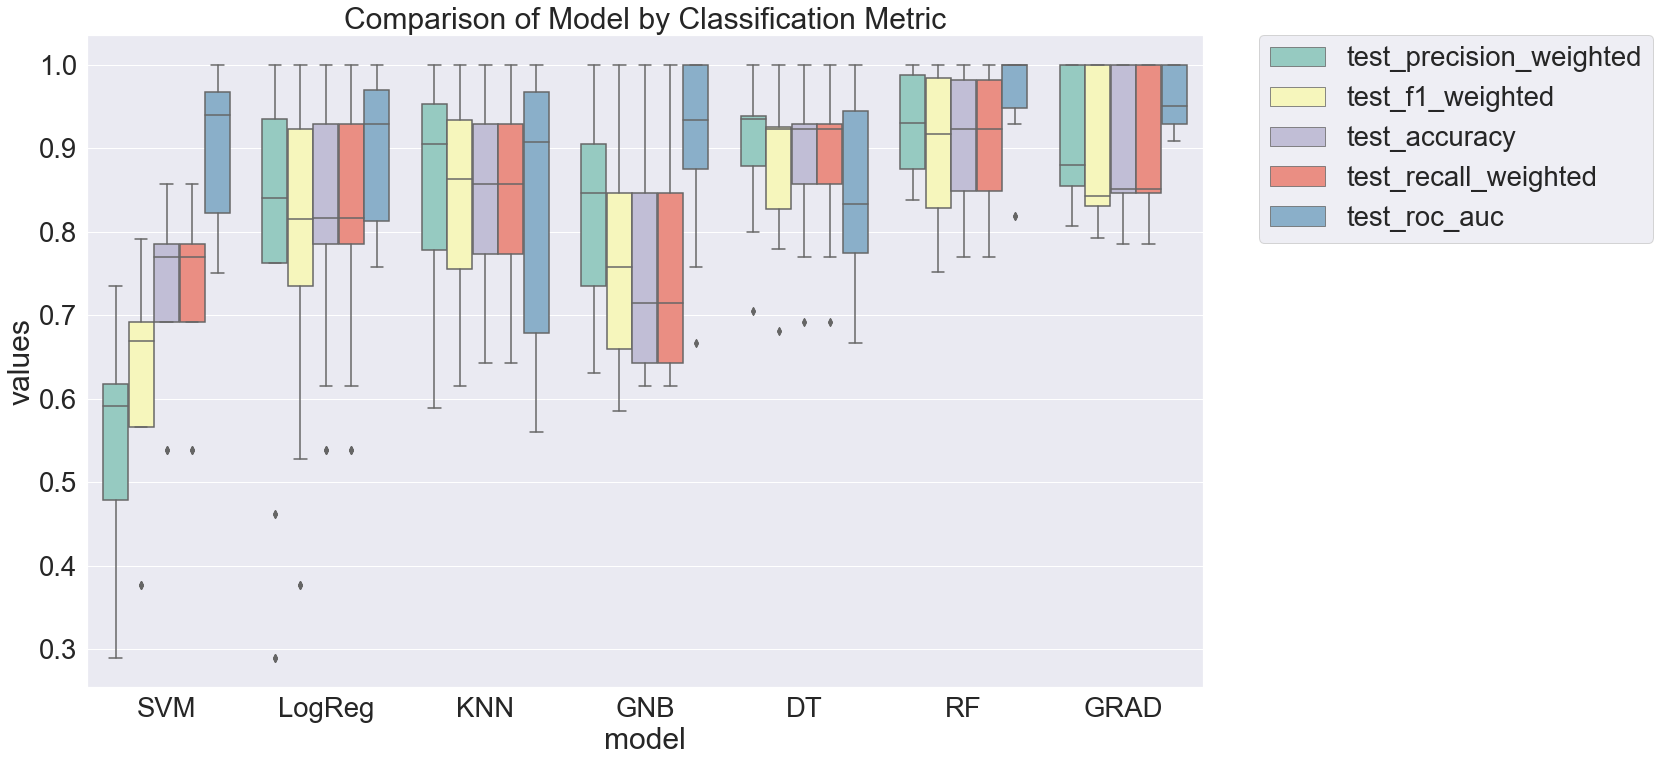

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

It is significant that SVMs fit data poorly. Random Forest fit the data better. How about the difference between training and scoring times?

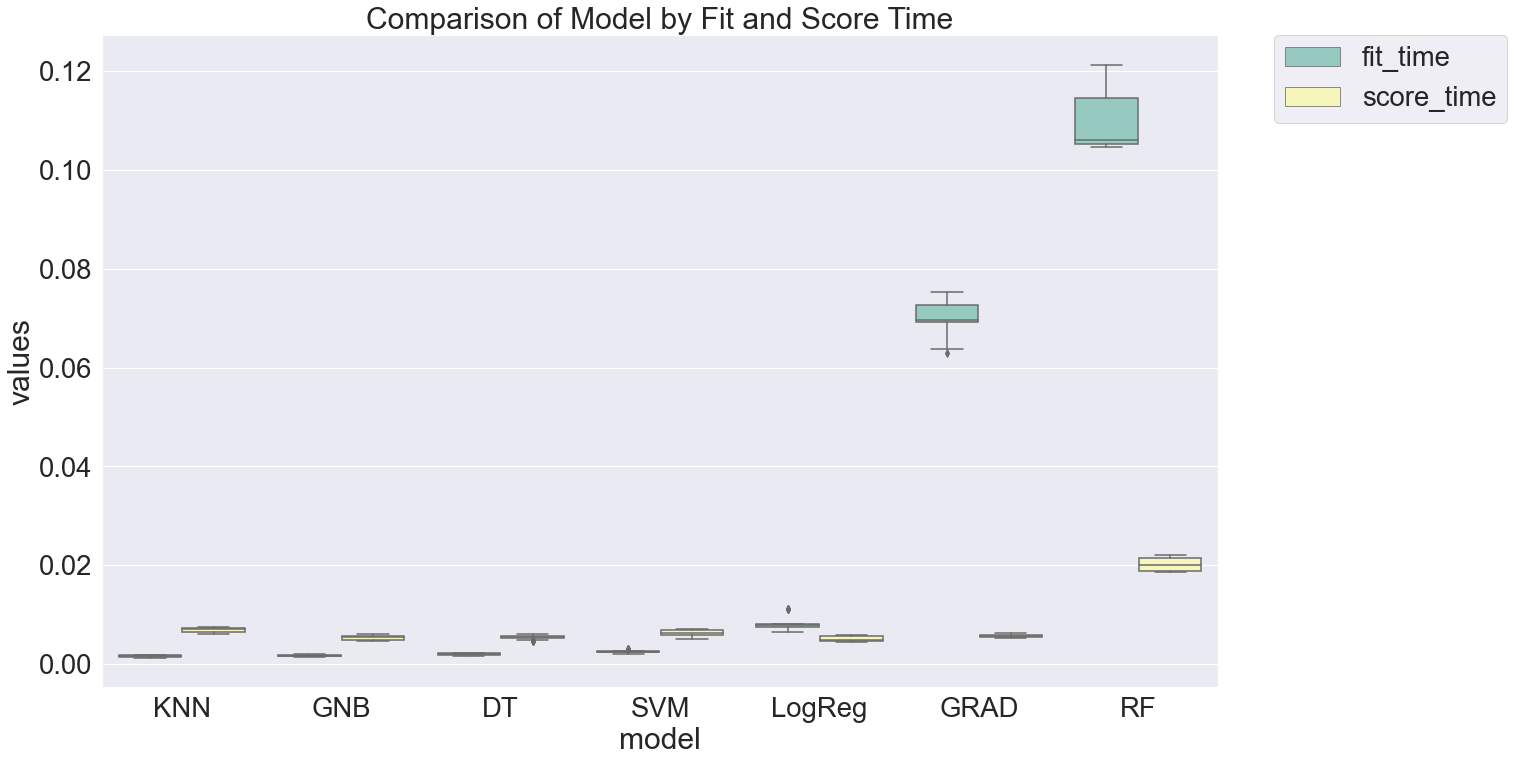

In [35]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

As we can see, Random Forest perform better than other model no matter fit time or score time.

## Try to use ensemble to combine different model

In [36]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
bg = BaggingClassifier(GradientBoostingClassifier(random_state=0), max_features = 1.0, max_samples = 0.5) 
bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
evaluate(y_test, y_pred, X_test, bg)
# plot_learning_curves(bg, X_train, y_train, X_test, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   13                   2
Actual : positive                    0                  44 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542


                    Predict : negative  Predict :positive 
Actual : negative                   13                   2
Actual : positive                    3                  41 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.95      0.93      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

0.9152542372881356
test  acc: 0.9152542372881356
train acc: 1.0


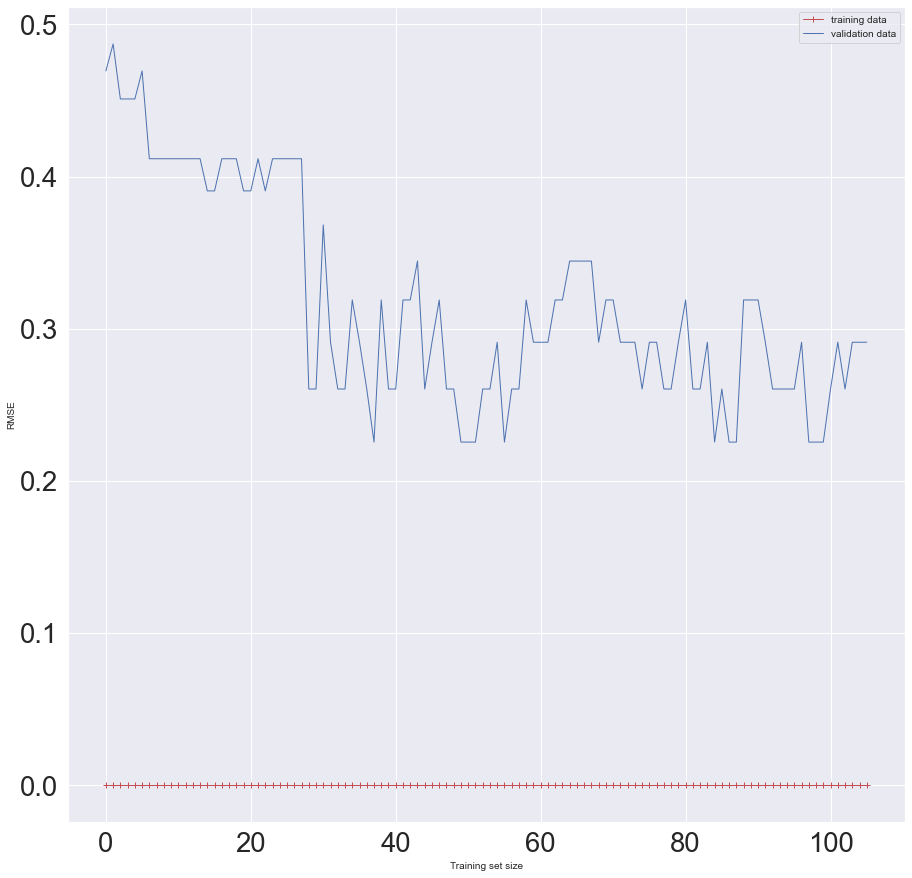

In [37]:
adb = AdaBoostClassifier(GradientBoostingClassifier(random_state=0), n_estimators = 10, learning_rate = 1)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
evaluate(y_test, y_pred, X_test, adb)
plot_learning_curves(adb, X_train, y_train, X_test, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   14                   1
Actual : positive                    3                  41 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.98      0.93      0.95        44

    accuracy                           0.93        59
   macro avg       0.90      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59

0.9322033898305084
test  acc: 0.9152542372881356
train acc: 1.0


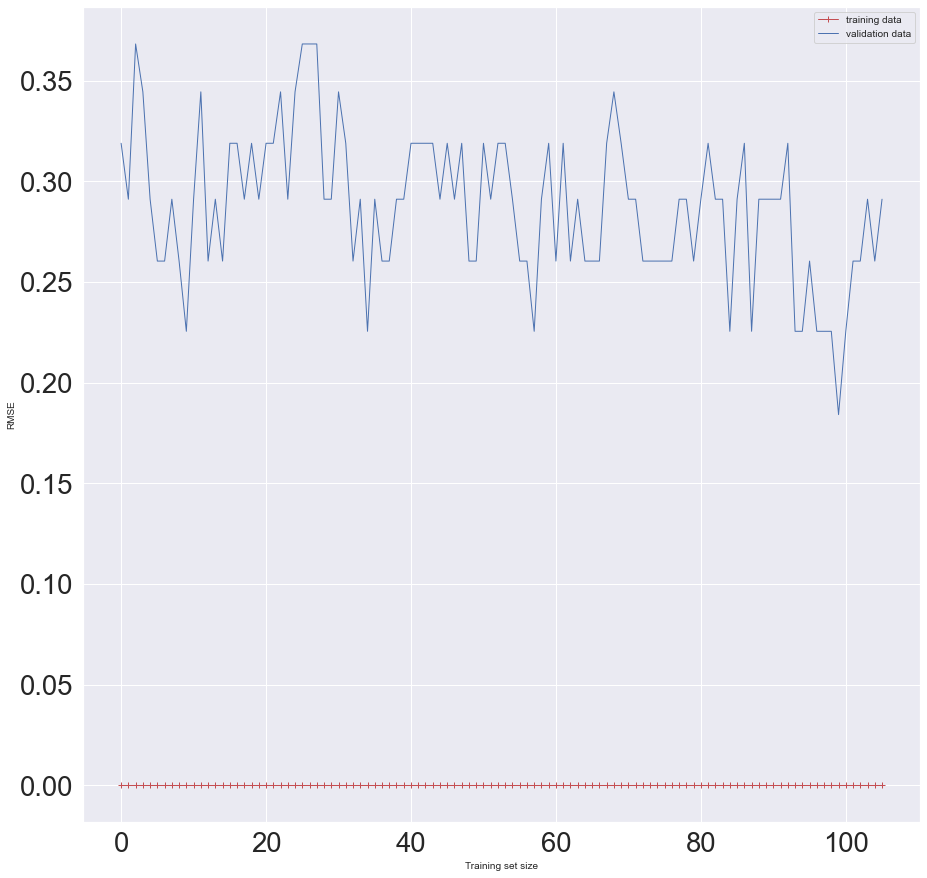

In [38]:
evc = VotingClassifier(estimators = [("GRAD",GradientBoostingClassifier(random_state=0)), ('RF',RandomForestClassifier()),('LogReg', LogisticRegression())], voting = 'hard')
evc.fit(X_train, y_train)
y_pred = evc.predict(X_test)
evaluate(y_test, y_pred, X_test, evc)
plot_learning_curves(evc, X_train, y_train, X_test, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   14                   1
Actual : positive                    2                  42 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.97        44

    accuracy                           0.95        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59

0.9491525423728814
test  acc: 0.9322033898305084
train acc: 1.0


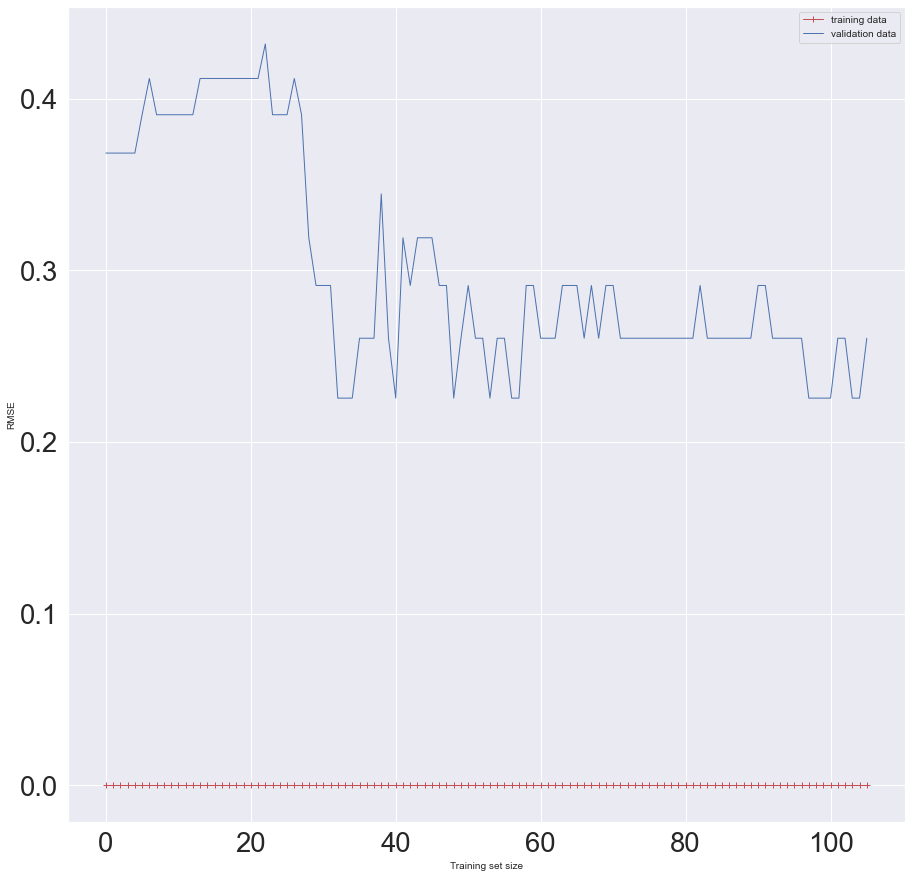

In [39]:
evc = VotingClassifier(estimators = [("GRAD",GradientBoostingClassifier(random_state=0)), ('RF',RandomForestClassifier()),('LogReg', LogisticRegression())], voting = 'soft')
evc.fit(X_train, y_train)
y_pred = evc.predict(X_test)
evaluate(y_test, y_pred, X_test, evc)
plot_learning_curves(evc, X_train, y_train, X_test, y_test)

                    Predict : negative  Predict :positive 
Actual : negative                   11                   4
Actual : positive                    2                  42 

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59

0.8983050847457628
test  acc: 0.9322033898305084
train acc: 0.9191176470588235


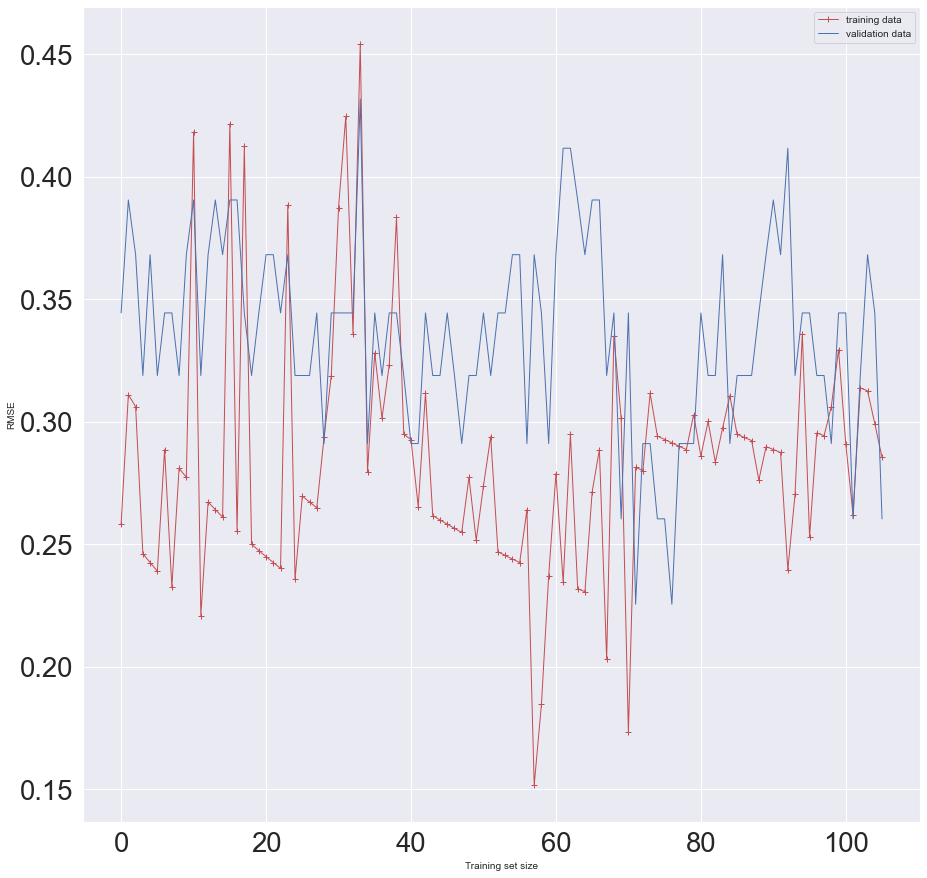

In [40]:
from sklearn.ensemble import StackingClassifier
lg = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='rbf')
gnb = GaussianNB()
estimators = [('dt', dt), ('lg',lg), ('svm', svm), ('gnb', gnb)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)
evaluate(y_test, y_pred, X_test, sclf)
plot_learning_curves(sclf, X_train, y_train, X_test, y_test)


BaggingClassifier with GradientBoostingClassifier can get a nice accuracy value.

## Conclusion
RandomForest model can get the best accuracy. Although sometimes the accuracy will drop to 0.85, it is still better than other model. Moreover, roc_auc value is around 0.9. I think it is quite nice. In the future, this module can be useful to classify the patient with Parkinson's disease. We can customize the medicine treatment for these patients. It requires more efforts to help these patients.